### Importación de datos



In [12]:
from idlelib.colorizer import matched_named_groups

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from pandas.core.interchange.dataframe_protocol import DataFrame

url = 'base-de-datos-challenge1-latam/tienda_1 .csv'
url2 ='base-de-datos-challenge1-latam/tienda_2.csv'
url3 ='base-de-datos-challenge1-latam/tienda_3.csv'
url4 ='base-de-datos-challenge1-latam/tienda_4.csv'

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda
# tienda2.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


# 1. Análisis de facturación



In [13]:
ingreso_total_tienda1= tienda.Precio.sum()
ingreso_total_tienda2= tienda2.Precio.sum()
ingreso_total_tienda3= tienda3.Precio.sum()
ingreso_total_tienda4= tienda4.Precio.sum()
valores_facturacion= [ingreso_total_tienda1,ingreso_total_tienda2,ingreso_total_tienda3,ingreso_total_tienda4]
indice_tiendas= ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

print("El ingreso total de la tienda 1 es: {:,.0f}\nEl ingreso total de la tienda 2 es: {:,.0f}\nEl ingreso total de la tienda 3 es: {:,.0f}\nEl ingreso total de la tienda 4 es: {:,.0f}".format(ingreso_total_tienda1,ingreso_total_tienda2,ingreso_total_tienda3,ingreso_total_tienda4))



El ingreso total de la tienda 1 es: 1,150,880,400
El ingreso total de la tienda 2 es: 1,116,343,500
El ingreso total de la tienda 3 es: 1,098,019,600
El ingreso total de la tienda 4 es: 1,038,375,700


In [23]:
valores_ingreso= pd.DataFrame(valores_facturacion, columns=['Ingreso Total'], index= indice_tiendas)

# valores_ingreso.iloc[0]=valores_ingreso.iloc[0].apply('{:,.0f}'.format)
# valores_ingreso.iloc[1]=valores_ingreso.iloc[1].apply('{:,.0f}'.format)
# valores_ingreso.iloc[2]=valores_ingreso.iloc[2].apply('{:,.0f}'.format)
# valores_ingreso.iloc[3]=valores_ingreso.iloc[3].apply('{:,.0f}'.format)
valores_ingreso

,Ingreso Total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


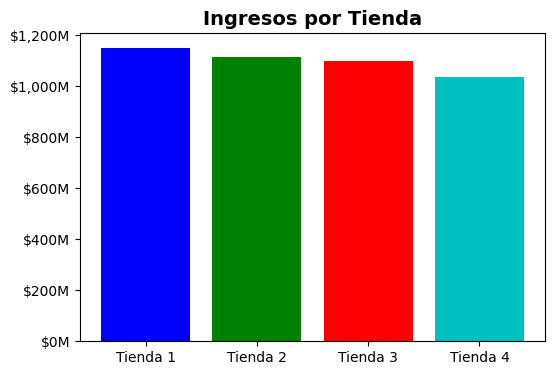

In [15]:
from matplotlib.ticker import FuncFormatter

x= indice_tiendas
y = valores_ingreso['Ingreso Total']
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = ['b','g','r','c'])
ax.yaxis.set_major_formatter(FuncFormatter(millones))
ax.set_title("Ingresos por Tienda", fontsize=14, fontweight='bold')

plt.show()

# Colores:
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white

# 2. Ventas por categoría

In [16]:
categoria_tienda1= tienda.groupby('Categoría del Producto').size().sort_values()
categoria_tienda2= tienda2.groupby('Categoría del Producto').size().sort_values()
categoria_tienda3= tienda3.groupby('Categoría del Producto').size().sort_values()
categoria_tienda4= tienda4.groupby('Categoría del Producto').size().sort_values()
# categoria_tienda1
# categoria_tienda2





# TODO Revisar si se puede mejorar la impresion de los resultados
categorias_tiendas= pd.concat([tienda,tienda2,tienda3,tienda4])
categorias_agrupadas= categorias_tiendas.groupby('Categoría del Producto').size().sort_values()
categorias_agrupadas.name= 'Cantidad de productos vendidos'
categorias_agrupadas


Categoría del Producto
Artículos para el hogar     730
Libros                      742
Instrumentos musicales      753
Deportes y diversión       1113
Electrodomésticos          1149
Juguetes                   1290
Electrónicos               1772
Muebles                    1886
Name: Cantidad de productos vendidos, dtype: int64

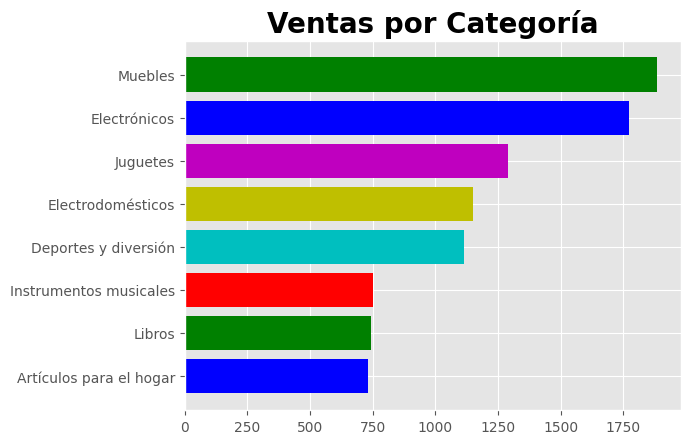

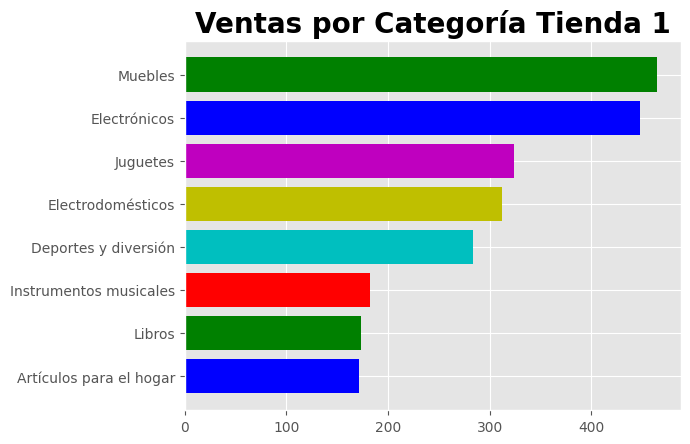

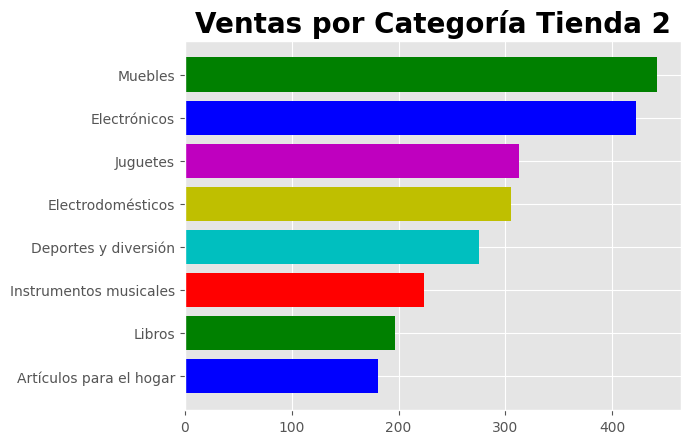

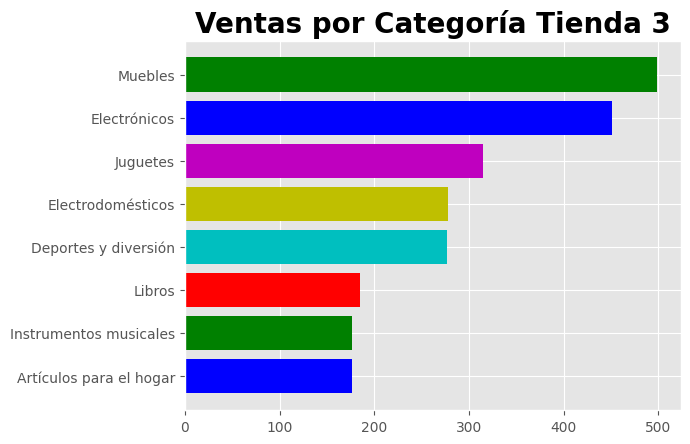

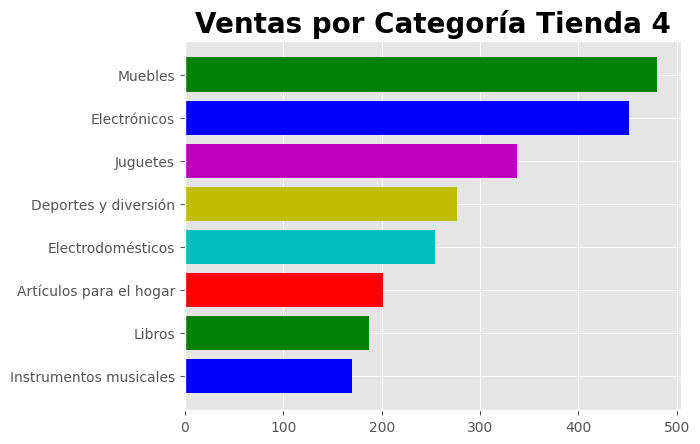

In [24]:
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

ax1.set_title("Ventas por Categoría", fontsize=20, fontweight='bold')
ax1.barh(categorias_agrupadas.index, categorias_agrupadas.values, color= ['b','g','r','c','y','m'])
plt.subplots_adjust(wspace=0.7, hspace=0.7)

ax2.set_title("Ventas por Categoría Tienda 1", fontsize=20, fontweight='bold')
ax2.barh(categoria_tienda1.index, categoria_tienda1.values, color= ['b','g','r','c','y','m'])

ax3.set_title("Ventas por Categoría Tienda 2", fontsize=20, fontweight='bold')
ax3.barh(categoria_tienda2.index, categoria_tienda2.values, color= ['b','g','r','c','y','m'])

ax4.set_title("Ventas por Categoría Tienda 3", fontsize=20, fontweight='bold')
ax4.barh(categoria_tienda3.index, categoria_tienda3.values, color= ['b','g','r','c','y','m'])

ax5.set_title("Ventas por Categoría Tienda 4", fontsize=20, fontweight='bold')
ax5.barh(categoria_tienda4.index, categoria_tienda4.values, color= ['b','g','r','c','y','m'])


# categorias_agrupadas.plot(kind="bar", x= categorias_agrupadas.index, y= categorias_agrupadas.values, color= ['b','g','r','c','y','m'], title="Ventas por Categoría ", figsize=(10, 8))

plt.show()

# 3. Calificación promedio de la tienda


La media de calificación de la tienda 1 es: 3.98 
La media de calificación de la tienda 2 es: 4.04 
La media de calificación de la tienda 3 es: 4.05 
La media de calificación de la tienda 4 es: 4.00 
 


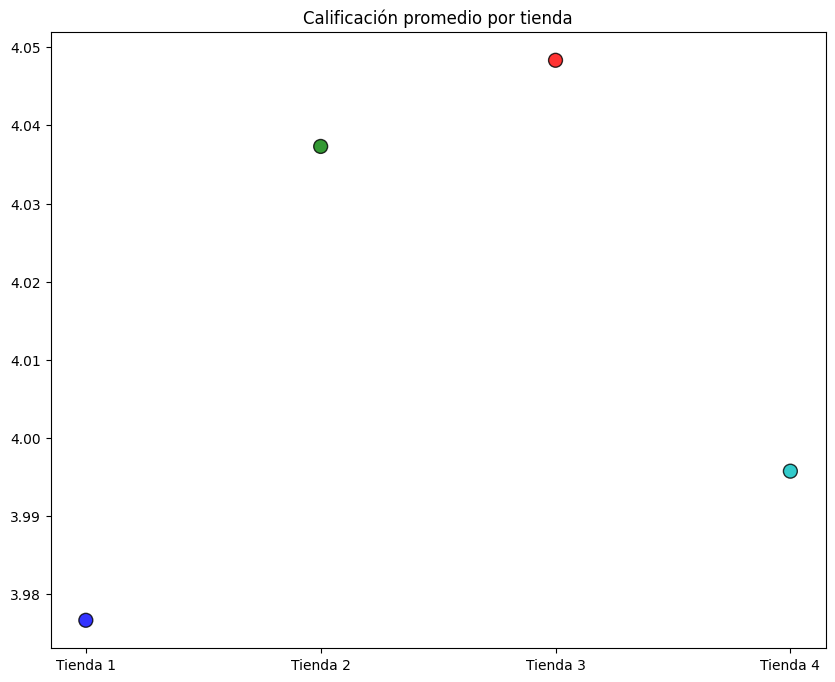

In [18]:
media_tienda1= tienda.iloc[:,7].mean()
media_tienda2= tienda2.iloc[:,7].mean()
media_tienda3= tienda3.iloc[:,7].mean()
media_tienda4= tienda4.iloc[:,7].mean()

print('La media de calificación de la tienda 1 es: {:,.2f} \nLa media de calificación de la tienda 2 es: {:,.2f} \nLa media de calificación de la tienda 3 es: {:,.2f} \nLa media de calificación de la tienda 4 es: {:,.2f} \n '.format(media_tienda1,media_tienda2,media_tienda3,media_tienda4))

plt.figure(figsize=(10, 8))
valores_media=[media_tienda1,media_tienda2,media_tienda3,media_tienda4]
destacar_media= (0.2,0,0.1,0)
plt.title('Calificación promedio por tienda')
plt.scatter(x=indice_tiendas, y=valores_media, s=100, c= ['b','g','r','c'], alpha=0.8, edgecolors='black')
plt.show()


# 4. Productos más y menos vendidos

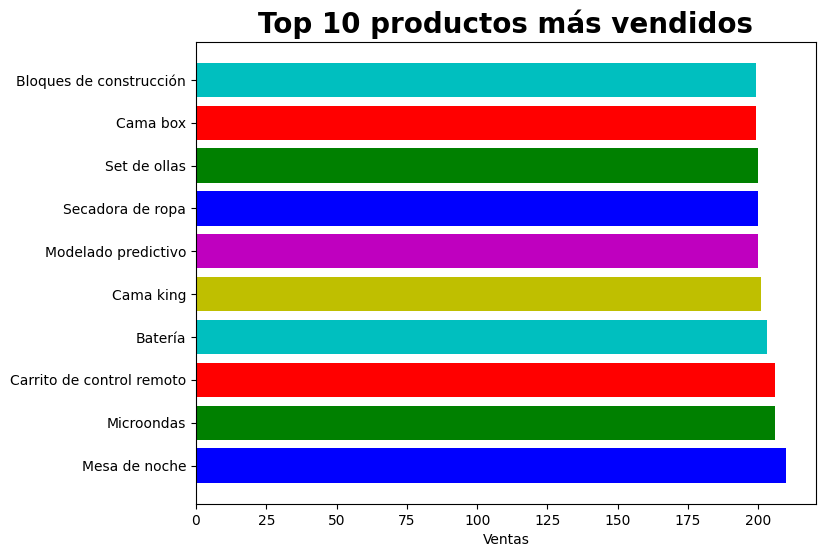

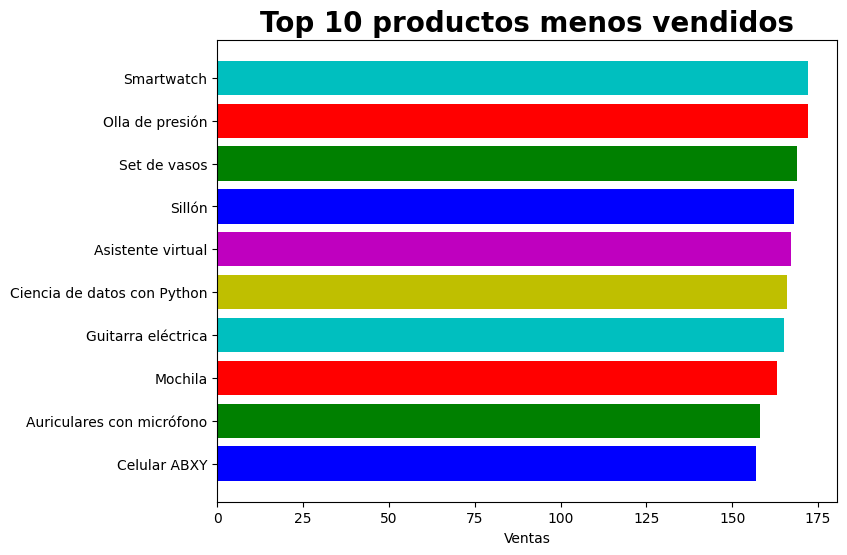

In [19]:
productos_vendidos_tienda1= tienda.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda2= tienda2.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda3= tienda3.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda4= tienda4.groupby('Producto').size().sort_values(ascending=False)


# TODO Revisar si se puede mejorar la impresion de los resultados

productos_vendidos= pd.concat([tienda,tienda2,tienda3,tienda4])
top_mas_vendidos= productos_vendidos.groupby('Producto').size().sort_values(ascending=False).head(10)
top_menos_vendidos= productos_vendidos.groupby('Producto').size().sort_values().head(10)
top_menos_vendidos.name= "Top 10 productos menos vendidos"

fig_top1, ax_top1 = plt.subplots(figsize = (8,6))
fig_top2, ax_top2 = plt.subplots(figsize = (8,6))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
ax_top1.barh(top_mas_vendidos.index, top_mas_vendidos.values, color= ['b','g','r','c','y','m'])
ax_top1.set_xlabel("Ventas")
ax_top1.set_title("Top 10 productos más vendidos", fontsize=20, fontweight='bold')

ax_top2.barh(top_menos_vendidos.index, top_menos_vendidos.values, color= ['b','g','r','c','y','m'])
ax_top2.set_xlabel("Ventas")
ax_top2.set_title("Top 10 productos menos vendidos", fontsize=20, fontweight='bold')

plt.show()





# 5. Envío promedio por tienda

In [25]:
costo_envio_tienda1= tienda['Costo de envío'].mean().astype('int')
costo_envio_tienda2= tienda2['Costo de envío'].mean().astype('int')
costo_envio_tienda3= tienda3['Costo de envío'].mean().astype('int')
costo_envio_tienda4= tienda4['Costo de envío'].mean().astype('int')
print('El costo de envío promedio de la tienda 1 es: {:,.0f} \nEl costo de envío promedio de la tienda 2 es: {:,.0f} \nEl costo de envío promedio de la tienda 3 es: {:,.0f} \nEl costo de envío promedio de la tienda 4 es: {:,.0f}'.format(costo_envio_tienda1,costo_envio_tienda2,costo_envio_tienda3,costo_envio_tienda4))

El costo de envío promedio de la tienda 1 es: 26,018 
El costo de envío promedio de la tienda 2 es: 25,216 
El costo de envío promedio de la tienda 3 es: 24,805 
El costo de envío promedio de la tienda 4 es: 23,459


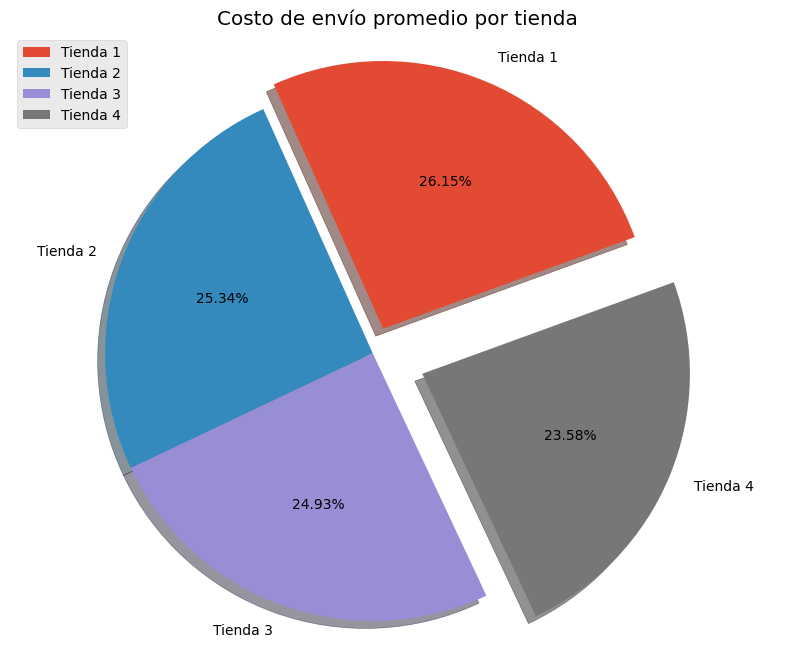

In [20]:
# TODO Revisar si se puede mejorar la impresion de los resultados

plt.figure(figsize=(10, 8))
tiendas= ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
costo_envio= [costo_envio_tienda1,costo_envio_tienda2,costo_envio_tienda3,costo_envio_tienda4]
destacar= (0.1,0,0,0.2)
plt.style.use('ggplot')
plt.title('Costo de envío promedio por tienda')
plt.pie(x=costo_envio, explode= destacar, labels= tiendas, autopct="%.2f%%", shadow=True, startangle=20)
plt.axis('equal') # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()



# Informe Final: Análisis de Tiendas para el Sr. Juan
### Introducción
El propósito de este análisis es determinar cuál de las cuatro tiendas es la más adecuada para que el Sr. Juan venda sus productos. Para ello, se evaluaron diversos factores clave: los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio. Este informe sintetiza los hallazgos obtenidos a partir de los datos y gráficos generados, justificando la recomendación final.

<hr></hr>

## Desarrollo
### Ingresos Totales

Los ingresos totales de las tiendas son los siguientes:
- Tienda 1: $1,150,880,400

- Tienda 2: $1,116,343,500

- Tienda 3: $1,098,019,600

- Tienda 4: $1,038,375,700

La tienda con mayores ingresos es la Tienda 1, lo que indica un alto volumen de ventas.


### Categorías de Productos Más y Menos Vendidas


Las categorías más vendidas en todas las tiendas son: Muebles y Electrónicos.
Las categorías menos vendidas son: Libros y Artículos para el hogar.
La Tienda 3 tiene una mayor diversidad en las categorías más vendidas, lo que podría ser una ventaja para el Sr. Juan.

### Calificaciones Promedio

Las calificaciones promedio de los clientes son:
- Tienda 1: 3.98

- Tienda 2: 4.04

- Tienda 3: 4.05

- Tienda 4: 4.00


Las Tiendas 2,3 y 4 tienen la misma calificación promedio, lo que refleja una alta satisfacción de los clientes.
Por otro lado la tienda 1 tiene una calificación promedio de 3.98, lo que podría indicar áreas de mejora en la atención al cliente o en la calidad de los productos.

Los costos de envío promedio son:
- Tienda 1: $26,018

- Tienda 2: $25,216

- Tienda 3: $24,805

- Tienda 4: $23,459

La Tienda 4 tiene el costo de envío más bajo, lo que podría ser un factor atractivo para los clientes.
<hr></hr>

### Conclusión
Con base en el análisis, se recomienda que el Sr. Juan venda su tienda 4. A pesar de ser la tienda que menos costo de envío tiene, también es la que menos ingresos genera. Su rendimiento operacional es bajo en comparación con las otra tiendas, a pesar que la tienda 1 tiene calificación baja, es la tienda que más ingresos genera, por tanto; la tienda 4 al ser la siguiente en el orden de calificación, es la que debería ser vendida.